In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Doing EDA
Check for missing values in categorical and continuous data and remove with appropriatew method.
Check and handle outliers with appropriate methods
Do univarite, bivariate and multivariate analyses

In [2]:
diamonddata=pd.read_csv('pricingOfDiamonds.csv')
diamonddata.head(5)

,ID,carat,cut,colour,clarity,depth,price,x,y,P,PC
0,1,0.23,Ideal,E,SI2,61.5,326,1417.391304,5.300813,Negative,Negative
1,2,0.21,Premium,E,SI1,59.8,326,1552.380952,5.451505,Positive,Negative
2,3,0.23,Good,E,VS1,56.9,327,1421.739130,5.746924,Positve,Negative
3,4,0.29,Premium,I,VS2,62.4,334,1151.724138,5.352564,NR,Negative
4,5,0.31,Good,J,SI2,63.3,335,1080.645161,5.292259,NR,Negative


In [3]:
diamonddata.info

<bound method DataFrame.info of           ID  carat        cut colour clarity  depth  price            x  \
0          1   0.23      Ideal      E     SI2   61.5    326  1417.391304   
1          2   0.21    Premium      E     SI1   59.8    326  1552.380952   
2          3   0.23       Good      E     VS1   56.9    327  1421.739130   
3          4   0.29    Premium      I     VS2   62.4    334  1151.724138   
4          5   0.31       Good      J     SI2   63.3    335  1080.645161   
...      ...    ...        ...    ...     ...    ...    ...          ...   
53935  53936   0.72      Ideal      D     SI1   60.8   2757  3829.166667   
53936  53937   0.72       Good      D     SI1   63.1   2757  3829.166667   
53937  53938   0.70  Very Good      D     SI1   62.8   2757  3938.571429   
53938  53939   0.86    Premium      H     SI2   61.0   2757  3205.813953   
53939  53940   0.75      Ideal      D     SI2   62.2   2757  3676.000000   

               y         P        PC  
0       5.300813

In [4]:
diamonddata.dtypes

ID           int64
carat      float64
cut         object
colour      object
clarity     object
depth      float64
price        int64
x          float64
y          float64
P           object
PC          object
dtype: object

In [5]:
#checking for missing values
diamonddata.isna().sum()

ID          0
carat       0
cut         0
colour      0
clarity     0
depth       0
price       0
x           0
y           0
P          10
PC         10
dtype: int64

In [8]:
#separating continuos from categorical
contdiamonds=diamonddata.select_dtypes(include=['int64','float64'])
contdiamonds

,ID,carat,depth,price,x,y
0,1,0.23,61.5,326,1417.391304,5.300813
1,2,0.21,59.8,326,1552.380952,5.451505
2,3,0.23,56.9,327,1421.739130,5.746924
3,4,0.29,62.4,334,1151.724138,5.352564
4,5,0.31,63.3,335,1080.645161,5.292259
...,...,...,...,...,...,...
53935,53936,0.72,60.8,2757,3829.166667,45.345395
53936,53937,0.72,63.1,2757,3829.166667,43.692552
53937,53938,0.70,62.8,2757,3938.571429,43.901274
53938,53939,0.86,61.0,2757,3205.813953,45.196721


In [9]:
catdiamonds=diamonddata.select_dtypes(include=['object'])
catdiamonds

,cut,colour,clarity,P,PC
0,Ideal,E,SI2,Negative,Negative
1,Premium,E,SI1,Positive,Negative
2,Good,E,VS1,Positve,Negative
3,Premium,I,VS2,NR,Negative
4,Good,J,SI2,NR,Negative
...,...,...,...,...,...
53935,Ideal,D,SI1,NR,SN
53936,Good,D,SI1,SP,SN
53937,Very Good,D,SI1,SN,SN
53938,Premium,H,SI2,SN,SP


In [11]:
contdiamonds.isna().sum()

ID       0
carat    0
depth    0
price    0
x        0
y        0
dtype: int64

In [12]:
catdiamonds.isna().sum()

cut         0
colour      0
clarity     0
P          10
PC         10
dtype: int64

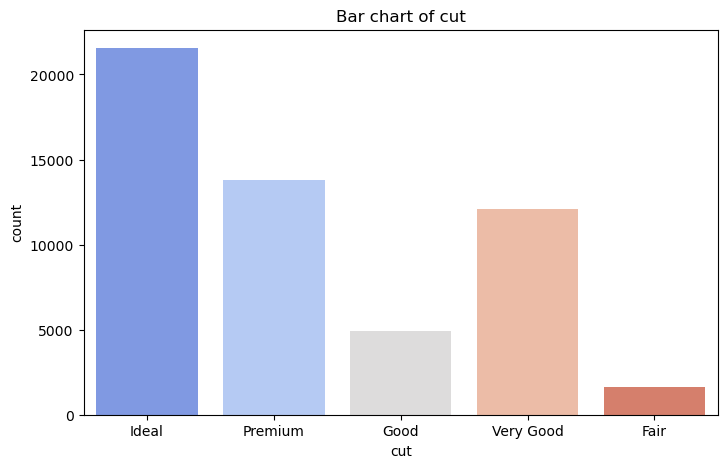

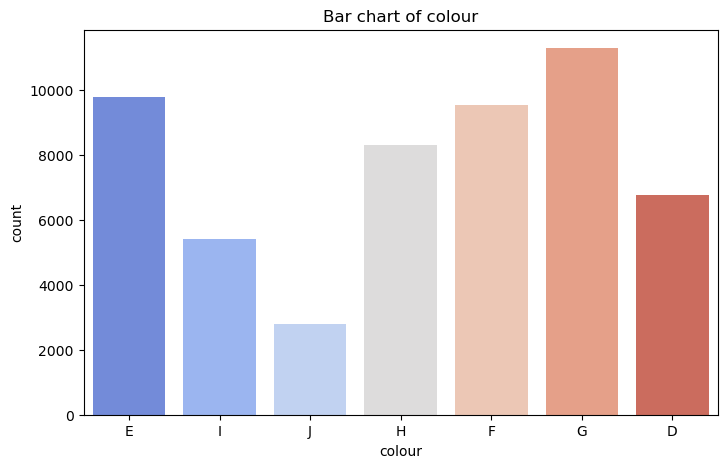

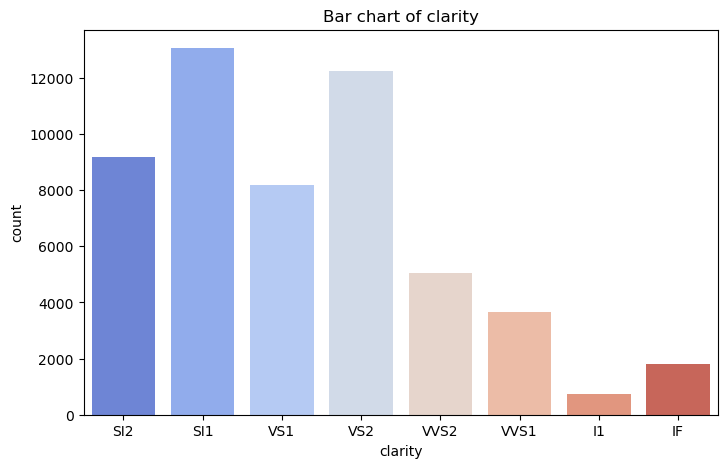

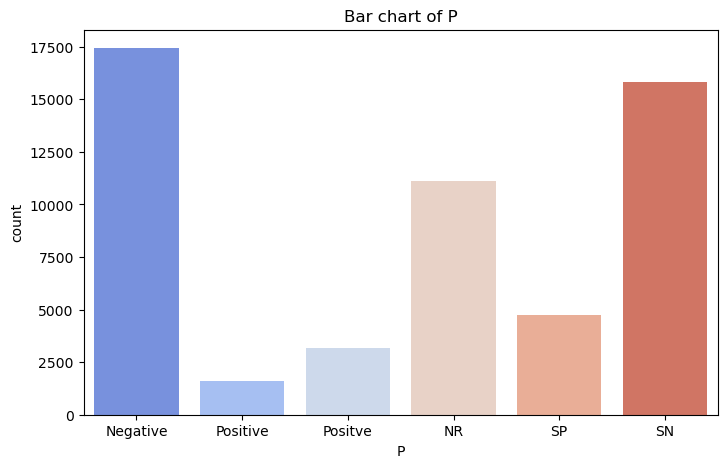

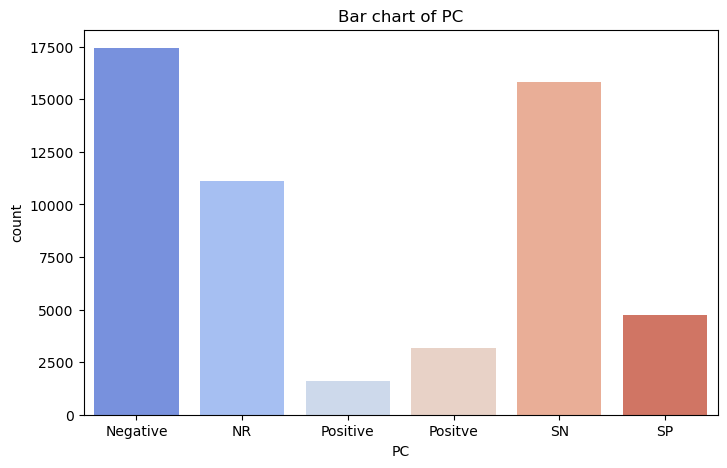

In [ ]:
#using a bar chart for categorical data
#to show how many times each category appears
for col in catdiamonds:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    sb.countplot(x=catdiamonds[col],palette='coolwarm')
    plt.title(f'Bar chart of {col}')
    plt.show()


In [ ]:
#since PC and P have negative appearing most times,
#we are going to use mode to impute for the missing values
